### About Data
##### Context
The main goal is to use this data to predict how much impurity is in the ore concentrate. As this impurity is measured every hour, if we can predict how much silica (impurity) is in the ore concentrate, we can help the engineers, giving them early information to take actions (empowering!). Hence, they will be able to take corrective actions in advance (reduce impurity, if it is the case) and also help the environment (reducing the amount of ore that goes to tailings as you reduce silica in the ore concentrate).
##### Content
The first column shows time and date range (from march of 2017 until september of 2017). Some columns were sampled every 20 second. Others were sampled on a hourly base.

The second and third columns are quality measures of the iron ore pulp right before it is fed into the flotation plant. Column 4 until column 8 are the most important variables that impact in the ore quality in the end of the process. From column 9 until column 22, we can see process data (level and air flow inside the flotation columns, which also impact in ore quality. The last two columns are the final iron ore pulp quality measurement from the lab.
Target is to predict the last column, which is the % of silica in the iron ore concentrate.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

sns.set(style = 'white')
%matplotlib inline

from collections import Counter
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy import stats

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data = pd.read_csv("MiningProcess_Flotation_Plant_Database.csv")
data.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235",...,"250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
1,2017-03-10 01:00:00,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532",...,"248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"
2,2017-03-10 01:00:00,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874",...,"248,071","451,24","468,927","434,61","449,688","484,411","447,826","458,567","66,91","1,31"
3,2017-03-10 01:00:00,"55,2","16,98","3047,36","568,665","397,939","10,0689","1,74","249,917","254,487",...,"251,147","452,441","458,165","442,865","446,21","471,411","437,69","427,669","66,91","1,31"
4,2017-03-10 01:00:00,"55,2","16,98","3033,69","558,167","400,254","10,0697","1,74","250,203","252,136",...,"248,928","452,441","452,9","450,523","453,67","462,598","443,682","425,679","66,91","1,31"


In [ ]:
df = pd.read_csv("MiningProcess_Flotation_Plant_Database.csv",decimal=",",parse_dates=["date"],infer_datetime_format=True)

In [ ]:
df.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   date                          737453 non-null  datetime64[ns]
 1   % Iron Feed                   737453 non-null  float64       
 2   % Silica Feed                 737453 non-null  float64       
 3   Starch Flow                   737453 non-null  float64       
 4   Amina Flow                    737453 non-null  float64       
 5   Ore Pulp Flow                 737453 non-null  float64       
 6   Ore Pulp pH                   737453 non-null  float64       
 7   Ore Pulp Density              737453 non-null  float64       
 8   Flotation Column 01 Air Flow  737453 non-null  float64       
 9   Flotation Column 02 Air Flow  737453 non-null  float64       
 10  Flotation Column 03 Air Flow  737453 non-null  float64       
 11  Flotation Col

In [ ]:
df = df.drop_duplicates()
df.shape

(736282, 24)

In [ ]:
df.isnull().sum()

date                            0
% Iron Feed                     0
% Silica Feed                   0
Starch Flow                     0
Amina Flow                      0
Ore Pulp Flow                   0
Ore Pulp pH                     0
Ore Pulp Density                0
Flotation Column 01 Air Flow    0
Flotation Column 02 Air Flow    0
Flotation Column 03 Air Flow    0
Flotation Column 04 Air Flow    0
Flotation Column 05 Air Flow    0
Flotation Column 06 Air Flow    0
Flotation Column 07 Air Flow    0
Flotation Column 01 Level       0
Flotation Column 02 Level       0
Flotation Column 03 Level       0
Flotation Column 04 Level       0
Flotation Column 05 Level       0
Flotation Column 06 Level       0
Flotation Column 07 Level       0
% Iron Concentrate              0
% Silica Concentrate            0
dtype: int64

In [ ]:
df.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,...,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.00000,736282.000000,736282.000000,736282.000000,736282.000000
mean,56.298307,14.648984,2869.636615,488.165523,397.570736,9.767315,1.680424,280.119813,277.121249,281.052538,...,290.740507,520.168402,522.555279,531.283790,420.169753,425.09453,429.889517,420.910258,65.049096,2.327270
std,5.160365,6.810741,1216.017896,91.254428,9.705444,0.387176,0.069206,29.633831,30.157126,28.571077,...,28.690520,131.085819,128.216232,150.931865,91.755819,84.47917,89.919586,84.899167,1.118721,1.125616
min,42.740000,1.310000,0.002026,241.669000,376.249000,8.753340,1.519820,175.510000,175.156000,176.469000,...,185.962000,149.218000,210.752000,126.255000,162.201000,166.99100,155.841000,175.349000,62.050000,0.600000
25%,52.670000,8.940000,2075.070000,431.835848,394.248000,9.527050,1.647390,250.278000,250.448000,250.847000,...,256.047750,416.902000,441.835250,411.256000,356.627000,357.59525,358.438000,356.705250,64.370000,1.440000
50%,56.080000,13.850000,3020.230000,504.352500,399.238000,9.797460,1.697580,299.341000,296.202000,298.690000,...,299.002000,491.749000,495.853500,494.184000,411.770500,408.65000,424.427000,410.940000,65.210000,2.000000
75%,59.720000,19.600000,3728.930000,553.335750,402.967000,10.037800,1.728380,300.147000,300.686000,300.385000,...,301.907000,594.097750,595.293000,601.299000,485.285000,484.00800,492.773000,476.145000,65.860000,3.010000
max,65.780000,33.400000,6300.230000,739.538000,418.641000,10.808100,1.853250,373.871000,375.992000,364.346000,...,371.593000,862.274000,828.919000,886.822000,680.359000,675.64400,698.861000,659.902000,68.010000,5.530000


<AxesSubplot:>

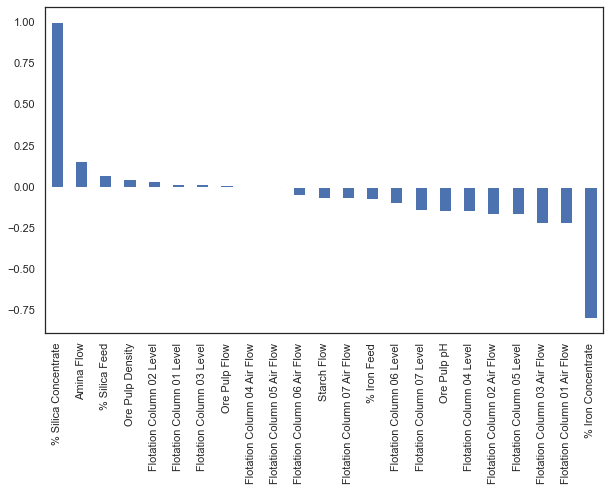

In [ ]:
plt.figure(figsize=(10,6))
df.corr()['% Silica Concentrate'].sort_values(ascending=False).plot(kind='bar')

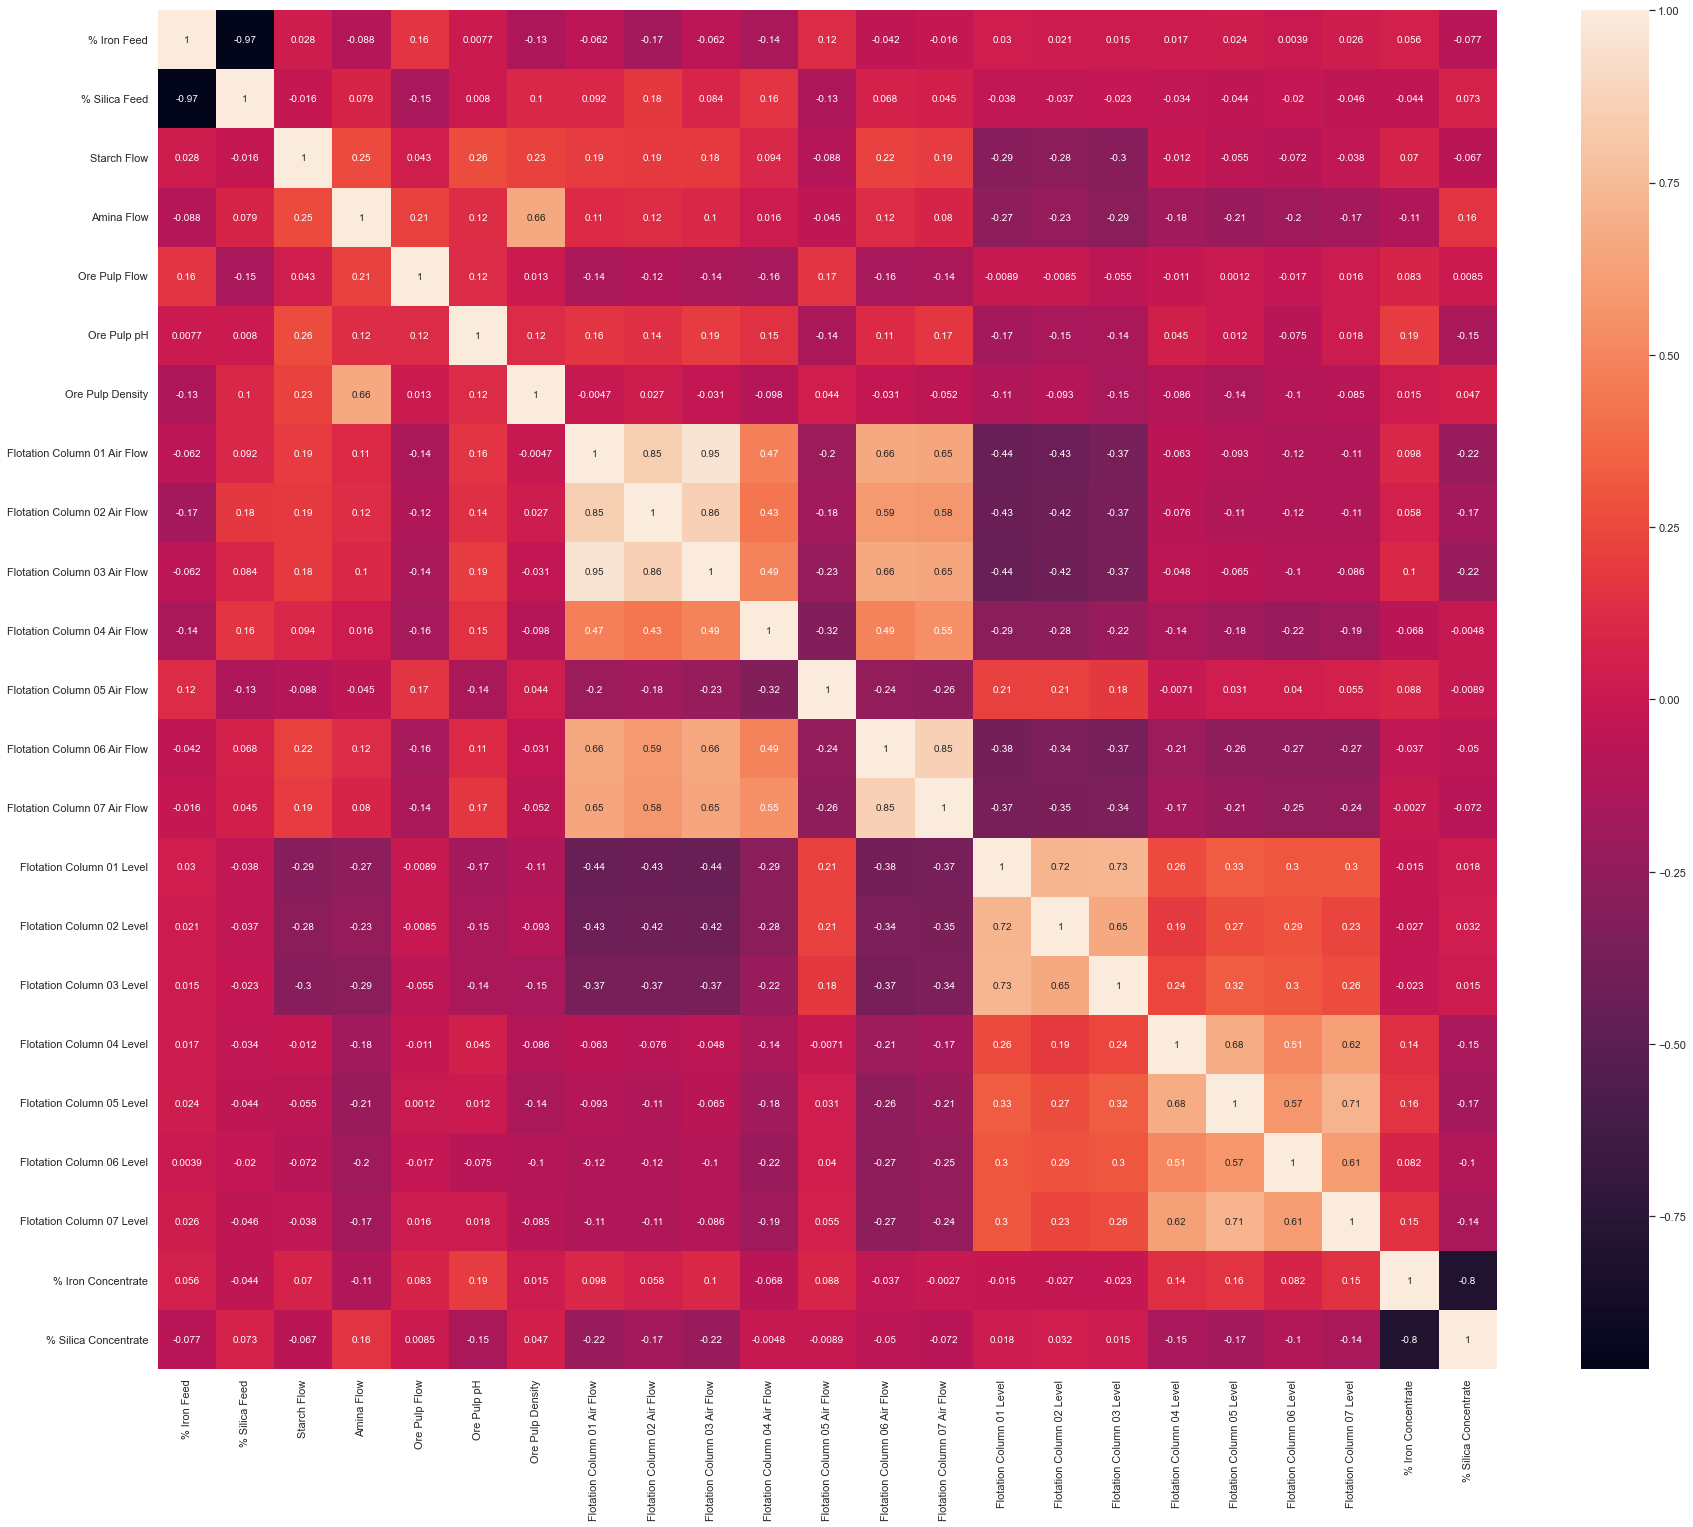

In [ ]:
plt.figure(figsize=(30,25))
hm = sns.heatmap(df.corr(),annot=True)

In [ ]:
# Iron feed and Silica feed are (negatively) correlerated (-.97)
# Iron conc. and Silica conc. are (negatively) correlerated (-.80)
feed = df.iloc[:,1:3]
important = df.iloc[:,3:8]
airFlow = df.iloc[:,8:15]
level = df.iloc[:,15:22]
pred = df.iloc[:,22:24]

In [ ]:
feed.corr()

,% Iron Feed,% Silica Feed
% Iron Feed,1.000000,-0.971876
% Silica Feed,-0.971876,1.000000


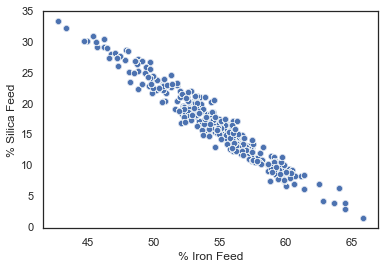

In [ ]:
ax = sns.scatterplot(data=feed,x="% Iron Feed",y="% Silica Feed")

In [ ]:
pred.corr()

,% Iron Concentrate,% Silica Concentrate
% Iron Concentrate,1.000000,-0.800598
% Silica Concentrate,-0.800598,1.000000


[Text(0, 0, 'Starch Flow')]

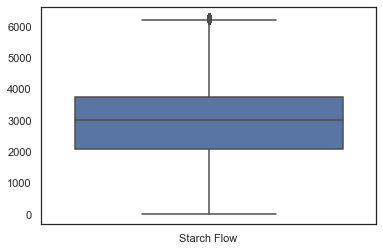

In [ ]:
#Boxplot of Feed Starch Flow values
ax0 = sns.boxplot(data = important.iloc[:,0])
ax0.set_xticklabels(["Starch Flow"])

[Text(0, 0, 'Amina Flow'), Text(1, 0, 'Ore Pulp Flow')]

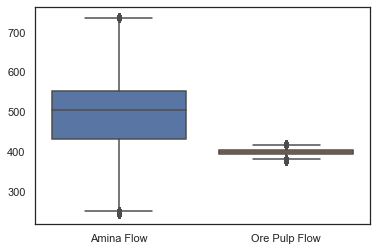

In [ ]:
#Boxplots of Other Feed Flow values
ax0 = sns.boxplot(data = important.iloc[:,1:3])
ax0.set_xticklabels(["Amina Flow","Ore Pulp Flow"])

[Text(0, 0, 'Ore Pulp pH')]

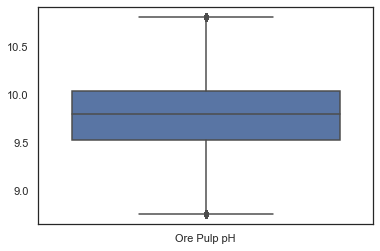

In [ ]:
#Boxplot of Ore Pulp pH : Highly Basic
ax0 = sns.boxplot(data = important.iloc[:,3])
ax0.set_xticklabels(["Ore Pulp pH"])

[Text(0, 0, 'Ore Pulp Density')]

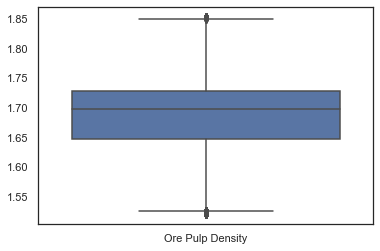

In [ ]:
#Boxplot of Ore Pulp Density
ax0 = sns.boxplot(data = important.iloc[:,4])
ax0.set_xticklabels(["Ore Pulp Density"])

Text(0, 0.5, 'Column AirFlow')

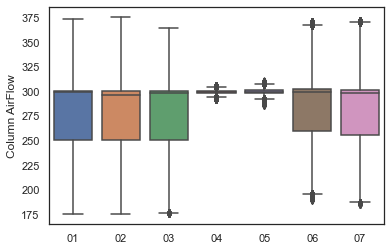

In [ ]:
#Boxplot of AirFlows in different Columns
ax1 = sns.boxplot(data = airFlow)
ax1.set_xticklabels(["01","02","03","04","05","06","07"])
ax1.set_ylabel("Column AirFlow")

Text(0, 0.5, 'Column Levels')

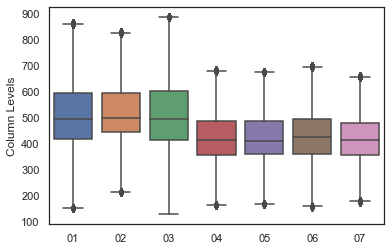

In [ ]:
#Boxplot of Floatation Column Levels
ax2 = sns.boxplot(data = level)
ax2.set_xticklabels(["01","02","03","04","05","06","07"])
ax2.set_ylabel("Column Levels")

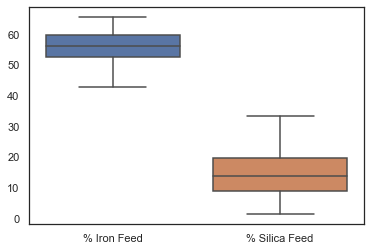

In [ ]:
#Boxplot of Feed
ax3 = sns.boxplot(data = feed)

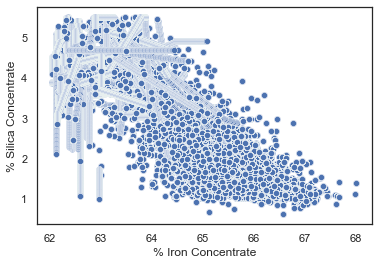

In [ ]:
ax = sns.scatterplot(data=pred,x="% Iron Concentrate",y="% Silica Concentrate")

---
## Principal Component Analysis of Air Flow

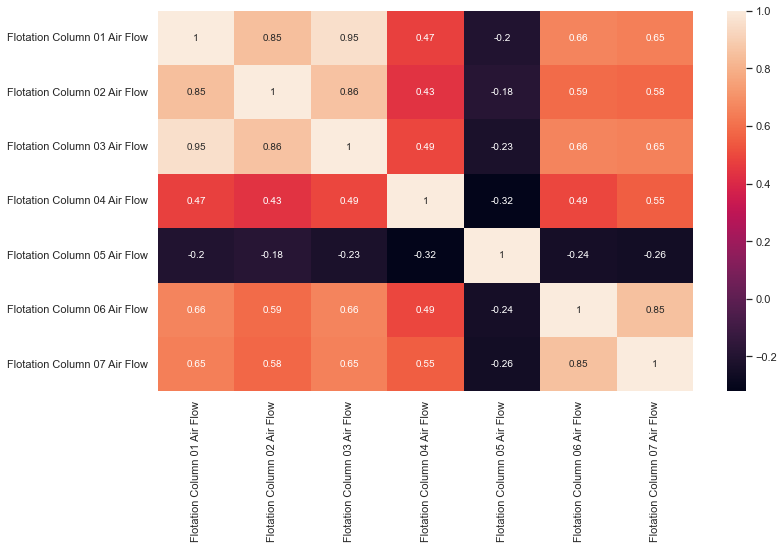

In [ ]:
plt.figure(figsize=(12,7))
hm = sns.heatmap(airFlow.corr(),annot=True)

In [ ]:
# Air flow 1-3 are highly correlated -> PCA Air Flow 1
# Air flow 4-5 are negatively correlated -> PCA Air Flow 2
# Air flow 6-7 are highly correlated -> PCA Air Flow 3
airFlowScaled1 = scale(airFlow.iloc[:,0:3])
airFlowScaled2 = scale(airFlow.iloc[:,3:5])
airFlowScaled3 = scale(airFlow.iloc[:,5:])

In [ ]:
pca = PCA(n_components=1)
pcaAirFlow1 = pca.fit_transform(airFlowScaled1)
pcaAirFlow2 = pca.fit_transform(airFlowScaled2)
pcaAirFlow3 = pca.fit_transform(airFlowScaled3)

var = pca.explained_variance_ratio_
var

array([0.92704579])

In [ ]:
pcaAirFlow = pd.DataFrame(data = pcaAirFlow1,columns = ["PCA Air Flow 1"])
pcaAirFlow['PCA Air Flow 2'] = pcaAirFlow2
pcaAirFlow['PCA Air Flow 3'] = pcaAirFlow3
pcaAirFlow.head()

,PCA Air Flow 1,PCA Air Flow 2,PCA Air Flow 3
0,1.678936,-2.45599,1.960631
1,1.713537,-2.45599,2.009270
2,1.773932,-2.45599,2.003772
3,1.652554,-2.45599,1.949543
4,1.693926,-2.45599,2.014497


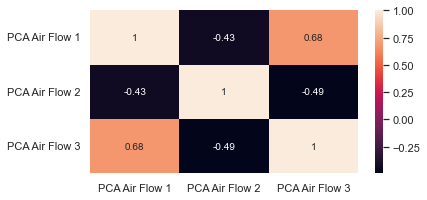

In [ ]:
plt.figure(figsize=(6,3))
hm = sns.heatmap(pcaAirFlow.corr(),annot=True)

---
## Principal Component Analysis of Level

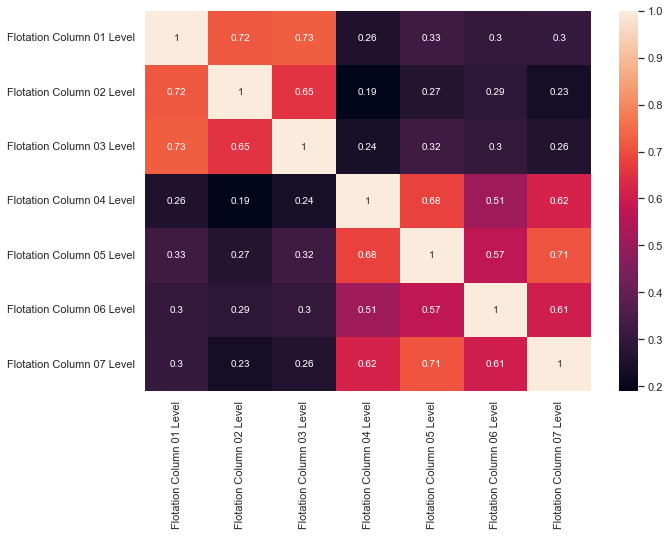

In [ ]:
plt.figure(figsize=(10,7))
hm = sns.heatmap(level.corr(),annot=True)

In [ ]:
# Level 1-3 can be clubbed in a single column
# Level 4-7 can be clubbed in another column
levelScaled1 = scale(level.iloc[:,0:3])
levelScaled2 = scale(level.iloc[:,3:])

In [ ]:
pca1 = PCA(n_components=1)
pcaLevel1 = pca1.fit_transform(levelScaled1)
pcaLevel2 = pca1.fit_transform(levelScaled2)

var1 = pca1.explained_variance_ratio_
var1

array([0.7132523])

In [ ]:
pca2 = PCA(n_components=2)
pcaLevel1 = pca2.fit_transform(levelScaled1)
pcaLevel2 = pca2.fit_transform(levelScaled2)

var2 = pca2.explained_variance_ratio_
var2

array([0.7132523 , 0.12815907])

In [ ]:
pcaLevel = pd.DataFrame(data = pcaLevel1,columns = ["PCA Level 1.1","PCA Level 1.2"])
pcaLevel2 = pd.DataFrame(data = pcaLevel2,columns = ["PCA Level 2.1","PCA Level 2.2"])
pcaLevel["PCA Level 2.1"] = pcaLevel2["PCA Level 2.1"]
pcaLevel["PCA Level 2.2"] = pcaLevel2["PCA Level 2.2"]
pcaLevel.head()

,PCA Level 1.1,PCA Level 1.2,PCA Level 2.1,PCA Level 2.2
0,1.083831,-0.007463,1.312343,-0.183747
1,1.093430,-0.061362,1.143928,-0.204352
2,0.914977,0.154693,0.847732,-0.173428
3,0.926126,0.055801,0.507921,-0.215997
4,0.920496,-0.008825,0.512332,-0.178874


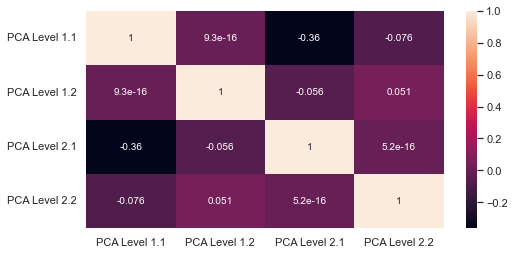

In [ ]:
plt.figure(figsize=(8,4))
hm = sns.heatmap(pcaLevel.corr(),annot=True)

In [ ]:
pcaAirLevel = pd.DataFrame(pcaAirFlow)
pcaAirLevel["PCA Level 1.1"] = pcaLevel["PCA Level 1.1"]
pcaAirLevel["PCA Level 1.2"] = pcaLevel["PCA Level 1.2"]
pcaAirLevel["PCA Level 2.1"] = pcaLevel["PCA Level 2.1"]
pcaAirLevel["PCA Level 2.2"] = pcaLevel["PCA Level 2.2"]

In [ ]:
df2 = pcaAirLevel
df2["% Silica Concentrate"] = df["% Silica Concentrate"]
df2.head()

,PCA Air Flow 1,PCA Air Flow 2,PCA Air Flow 3,PCA Level 1.1,PCA Level 1.2,PCA Level 2.1,PCA Level 2.2,% Silica Concentrate
0,1.678936,-2.45599,1.960631,1.083831,-0.007463,1.312343,-0.183747,1.31
1,1.713537,-2.45599,2.009270,1.093430,-0.061362,1.143928,-0.204352,1.31
2,1.773932,-2.45599,2.003772,0.914977,0.154693,0.847732,-0.173428,1.31
3,1.652554,-2.45599,1.949543,0.926126,0.055801,0.507921,-0.215997,1.31
4,1.693926,-2.45599,2.014497,0.920496,-0.008825,0.512332,-0.178874,1.31


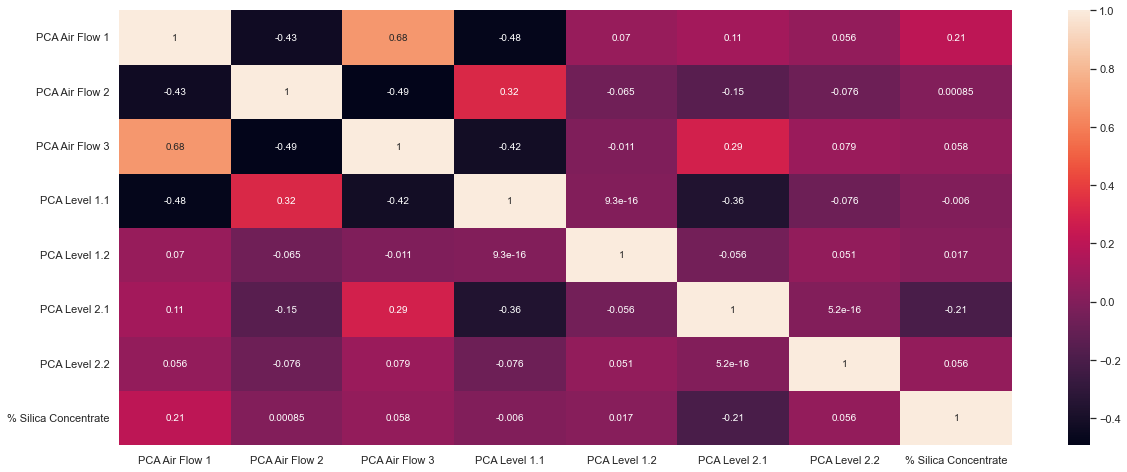

In [ ]:
plt.figure(figsize=(20,8))
hm = sns.heatmap(df2.corr(),annot=True)